<a href="https://colab.research.google.com/github/Jllin50/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [20]:
# TODO - your code!
from google.colab import files
uploaded = files.upload()

Saving house-votes-84.data to house-votes-84.data


In [0]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('house-votes-84.csv',header=None,
                 names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])

df = df.replace({'?':.5, 'n':0, 'y':1})

In [0]:
dem = df[df['party'] == 'democrat']
rep = df[df['party'] == 'republican']

In [36]:
dem.isnull().sum()

party                   0
handicapped-infants     0
water-project           0
budget                  0
physician-fee-freeze    0
el-salvador-aid         0
religious-groups        0
anti-satellite-ban      0
aid-to-contras          0
mx-missile              0
immigration             0
synfuels                0
education               0
right-to-sue            0
crime                   0
duty-free               0
south-africa            0
dtype: int64

In [0]:
from scipy import stats

def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = (np.std(data, ddof=1) / np.sqrt(n))
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  moe = stderr * t
  return (mean, mean - moe, mean + moe)

In [0]:
def confidence_interval_dataframe(df):
  
  confidence_intervals = []

  # List values by column and not by row
  df = df.values.T
  
  # Remove nan values from columns
  cleaned_df = []
  for col in df:
    cleaned_col = col[~np.isnan(col)]
    
    # Calculate Confidence interval for each issue
    confidence_intervals.append(confidence_interval(cleaned_col))
    
  confidence_intervals = pd.DataFrame(confidence_intervals, columns=['mean', 'lower', 'upper'])  
    
  return confidence_intervals

# We only want the issue columns not the string "party" column
only_votes = rep.drop('party', axis='columns')

confidence_interval_df = confidence_interval_dataframe(only_votes)

In [39]:
keys=['handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']
confidence_interval_df['Index'] = keys
confidence_interval_df = confidence_interval_df.set_index('Index')
confidence_interval_df['margin_of_error'] = confidence_interval_df['upper'] - confidence_interval_df['mean']

confidence_interval_df.head()

,mean,lower,upper,margin_of_error
Index,,,,
handicapped-infants,0.193452,0.133976,0.252929,0.059477
water-project,0.505952,0.434262,0.577643,0.071690
budget,0.142857,0.090713,0.195001,0.052144
physician-fee-freeze,0.979167,0.959881,0.998452,0.019285
el-salvador-aid,0.943452,0.909674,0.977231,0.033778


Text(0, 0.5, "Percent of Republicans voting 'yes'")

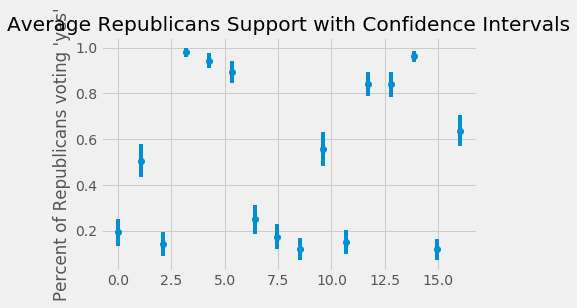

In [40]:
x = np.linspace(0, confidence_interval_df.shape[0], confidence_interval_df.shape[0])
y = confidence_interval_df['mean']
yerr = confidence_interval_df['margin_of_error']


plt.style.use('fivethirtyeight')
plt.errorbar(x, y, yerr, fmt='o');
plt.title('Average Republicans Support with Confidence Intervals')
plt.ylabel("Percent of Republicans voting 'yes'")

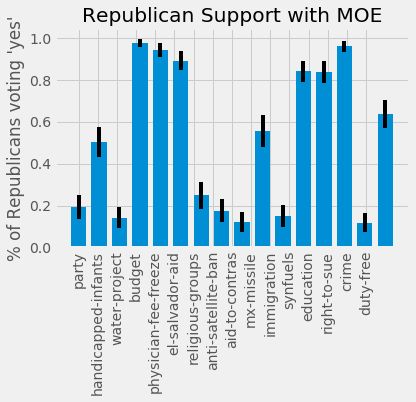

In [41]:
fig, ax = plt.subplots()
means = confidence_interval_df['mean']
error = confidence_interval_df['margin_of_error']
x_pos = np.arange(confidence_interval_df.shape[0])
issues = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']
ax.bar(x, means, yerr=error)
ax.set_ylabel("% of Republicans voting 'yes'")
ax.set_xticks(x_pos)
ax.set_xticklabels(issues)
ax.set_title('Republican Support with MOE', color='k')
ax.yaxis.grid(True)
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.xticks(rotation=90)
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

#Interpret the confidence interval - what does it tell you about the data and its distribution?

A confidence interval is a range of values with a percentage of ceratinty. For example if the confidence interval for a sample is 7.1 and 9.6 with 95% confidence, there is a 95% chance that the true mean of the sample is between those values.  


In [42]:
contingency_table = pd.crosstab(
    df['party'],
    df['crime'],
    margins=True
    )

contingency_table

crime,0.0,0.5,1.0,All
party,,,,
democrat,167,10,90,267
republican,3,7,158,168
All,170,17,248,435


In [51]:
# col_sums = contingency_table.iloc[2,0:3].values
# print(col_sums)

[170  17 248]


In [44]:
# row_sums = contingency_table.iloc[0:2,3].values
# print(row_sums)

[267 168]


In [45]:
# # Calculate Expected Values for each cell
# total = contingency_table.loc['All', 'All']
# print("Total number of observations:", total)

# expected = []
# for i in range(len(row_sums)):
#   expected_row = []
#   for column in col_sums:
#     expected_val = column*row_sums[i]/total
#     expected_row.append(expected_val)
#   expected.append(expected_row)
  
# print(np.array(expected))

Total number of observations: 435
[[104.34482759  10.43448276 152.22068966]
 [ 65.65517241   6.56551724  95.77931034]]


In [0]:
chi_squared = stats.chi2_contingency(contingency_table)

In [48]:
print(chi_squared)

163.31424314923504


ValueError: ignored

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)